In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")
df = pd.read_csv('Q1_data.csv')


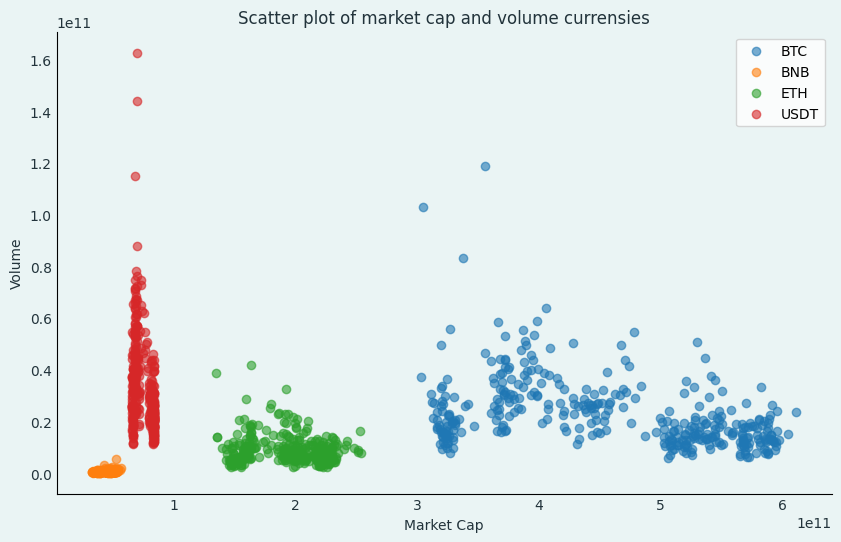

In [3]:
market_cap, volume = df.market_cap, df.volume

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df[df['symbol']=='BTC']["market_cap"], df[df['symbol']=='BTC']["volume"], marker="o", cmap="viridis", alpha=0.6, label='BTC')
ax.scatter(df[df['symbol']=='BNB']["market_cap"], df[df['symbol']=='BNB']["volume"], marker="o", cmap="viridis", alpha=0.6, label='BNB')
ax.scatter(df[df['symbol']=='ETH']["market_cap"], df[df['symbol']=='ETH']["volume"], marker="o", cmap="viridis", alpha=0.6, label='ETH')
ax.scatter(df[df['symbol']=='USDT']["market_cap"], df[df['symbol']=='USDT']["volume"], marker="o", cmap="viridis", alpha=0.6, label='USDT')
ax.set_title(
    "Scatter plot of market cap and volume currensies", fontsize=12, color="#22333b"
)
ax.set_ylabel("Volume", fontsize=10, color="#22333b")
ax.set_xlabel("Market Cap", fontsize=10, color="#22333b")
ax.tick_params(axis="both", length=0, labelcolor="#22333b")
ax.set_facecolor("#EAF4f4")
ax.legend()
fig.set_facecolor("#EAF4f4")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)


---

<h1>DBSCAN



DBSCAN requires only two parameters: epsilon and min_pts. Epsilon is the radius of the circle to be created around each data point to check the density and min_pts is the minimum number of data points required inside that circle for that data point to be classified as a Core point.

Now we scale the dataframe and then use DBScan for different values of epsilon and minimum samples that we require to count the data as core point.
in the end we found that best result is developed from choosing (min_pts = 15, eps = 0.25).


Now we are going to deeply check two things,<br>
first of all what is the effect of changing epsilon for a fixed min_pts (here specially min_pts = 15)<br>
then what is the effect of changing min_pts for a fixed epsilon value (here specially epsilon = 0.25)

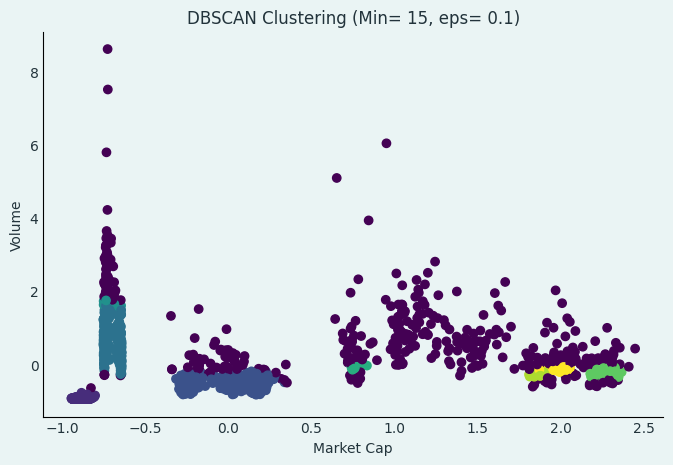

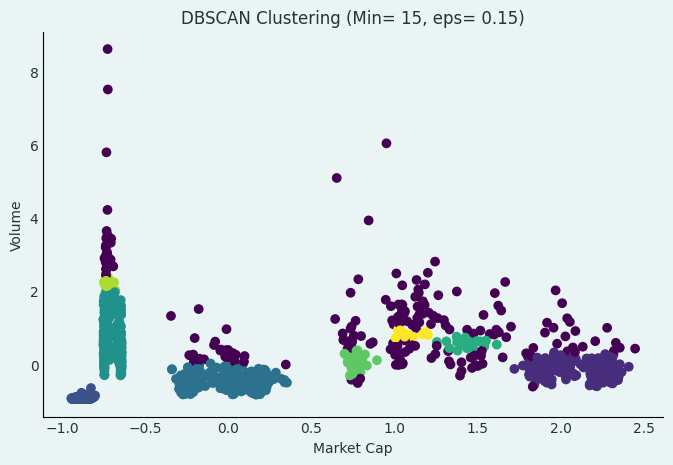

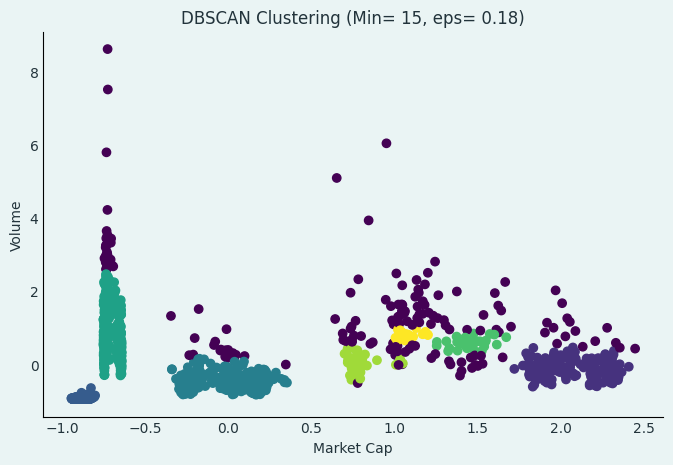

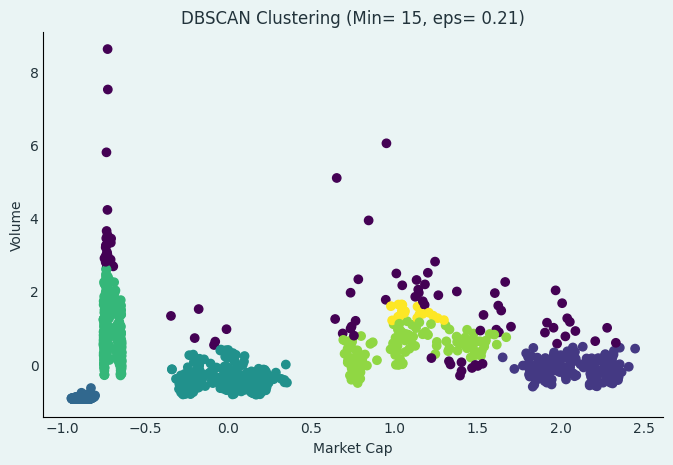

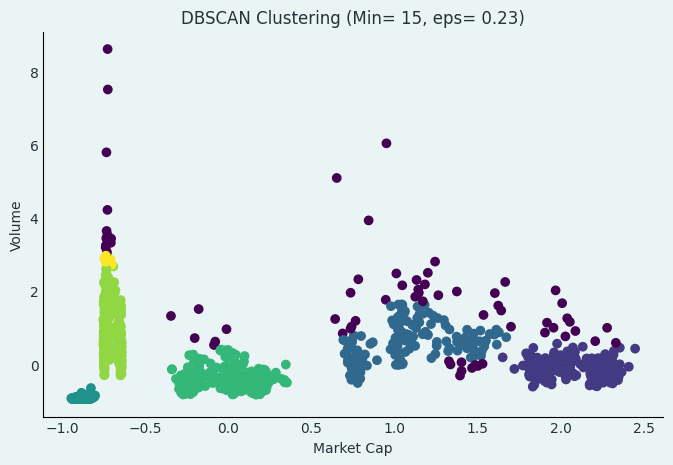

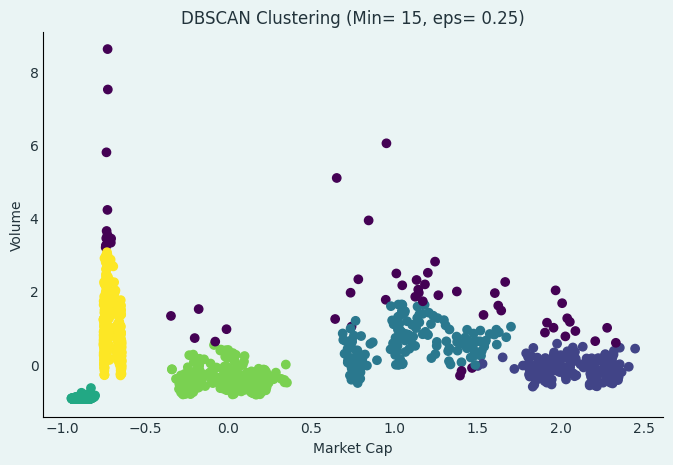

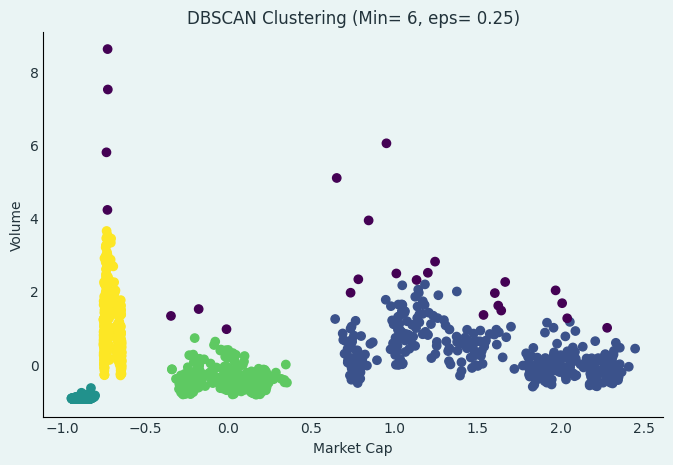

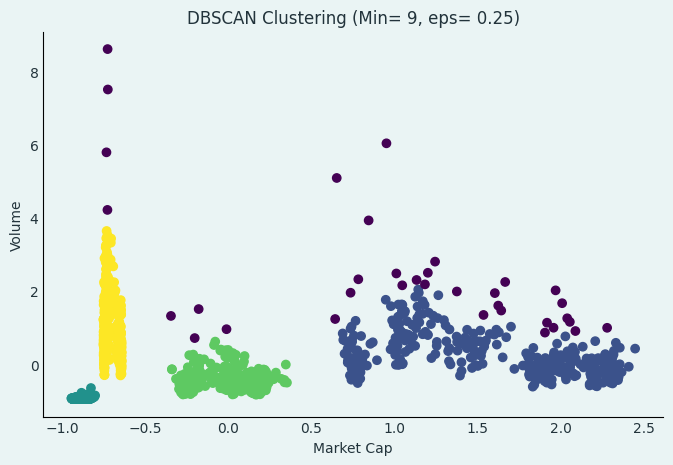

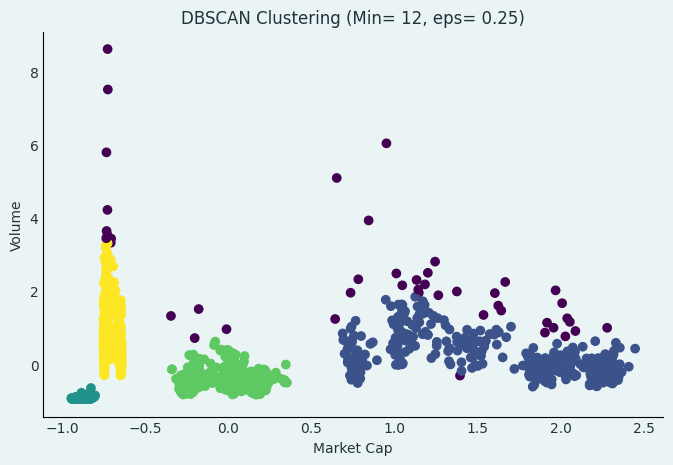

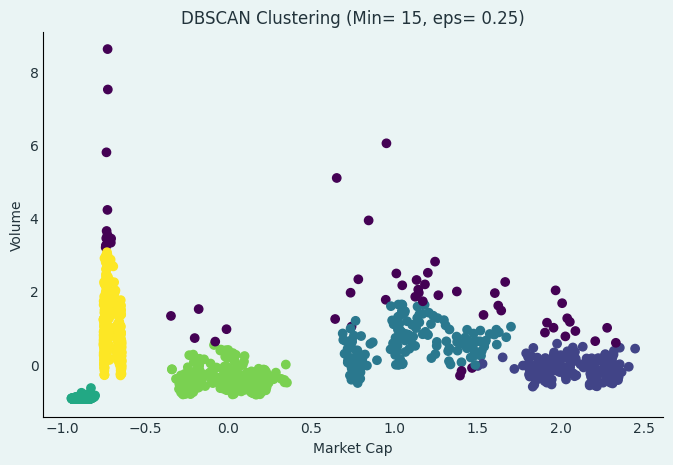

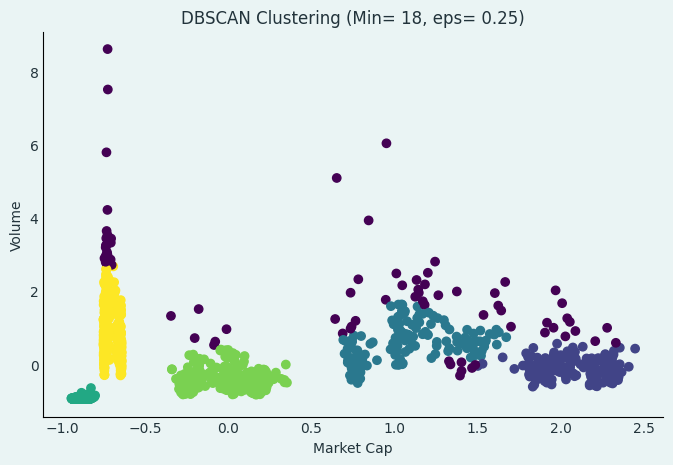

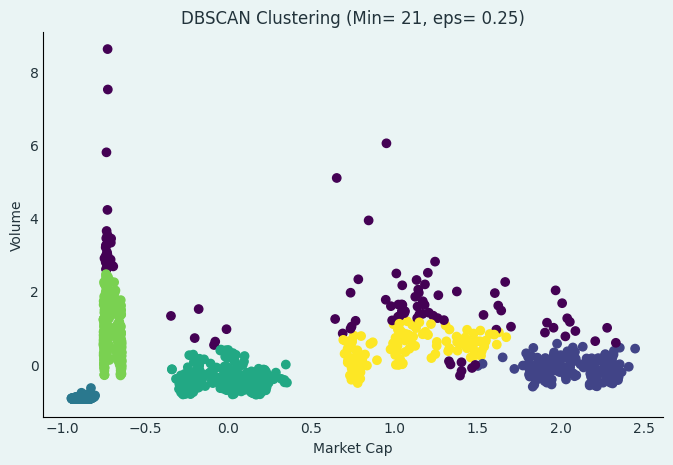

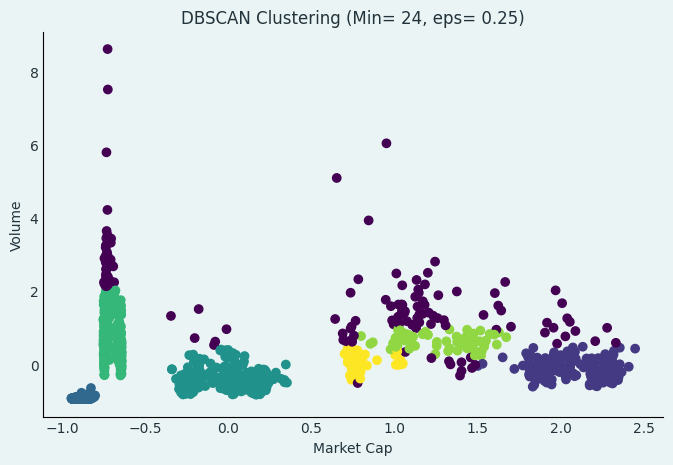

In [4]:
data = df

# Scaling the MarketCap and Volume
scaler = StandardScaler()
data[['market_cap', 'volume']] = scaler.fit_transform(data[['market_cap', 'volume']])

#DBSCAN parameters
epss = [0.1, 0.15, 0.18, 0.21, 0.23, 0.25]
min_samples = [6, 9, 12, 15, 18, 21, 24]

for eps in epss:
    # DBScan Function
    dbscan = DBSCAN(eps=eps, min_samples=15)
    data['cluster'] = dbscan.fit_predict(data[['market_cap', 'volume']])

    # Visualizing 
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.scatter(data['market_cap'], data['volume'], c=data['cluster'], cmap='viridis')
    ax.set_title(
    f'DBSCAN Clustering (Min= 15, eps= {eps})', fontsize=12, color="#22333b"
    )
    ax.set_ylabel("Volume", fontsize=10, color="#22333b")
    ax.set_xlabel("Market Cap", fontsize=10, color="#22333b")
    ax.tick_params(axis="both", length=0, labelcolor="#22333b")
    ax.set_facecolor("#EAF4f4")
    fig.set_facecolor("#EAF4f4")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.show()

for min_sample in min_samples:
    # DBScan Function
    dbscan = DBSCAN(eps=0.25, min_samples=min_sample)
    data['cluster'] = dbscan.fit_predict(data[['market_cap', 'volume']])

    # Visualizing 
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.scatter(data['market_cap'], data['volume'], c=data['cluster'], cmap='viridis')
    ax.set_title(
    f'DBSCAN Clustering (Min= {min_sample}, eps= 0.25)', fontsize=12, color="#22333b"
    )
    ax.set_ylabel("Volume", fontsize=10, color="#22333b")
    ax.set_xlabel("Market Cap", fontsize=10, color="#22333b")
    ax.tick_params(axis="both", length=0, labelcolor="#22333b")
    ax.set_facecolor("#EAF4f4")
    fig.set_facecolor("#EAF4f4")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.show()

---

<h3><u>Conclusion</u></h3>

with the charts above, we can see two obvious effects when min_pts and epsilon increases.<br>
when epsilon increases, the radius increase, so the number of cluster usually decrease and the size of the cluster increases. <br>
also when the min_pts increases, it will be harder for each point to join into a cluster and became core point. so usually the number of outliers increase.
<br>and we figure out that the epsilon = 0.25 and min_pts = 15 is what we need for 5 meaningful clusters.